In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
dementia = pd.read_csv(r"C:\Users\Akunna Anyamkpa\Documents\HAMOYE\PROJECT 2\dementia.csv")

In [3]:
dementia.head(4)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010


In [4]:
dementia.shape

(373, 15)

In [5]:
dementia.drop('Subject ID', axis='columns', inplace=True)
dementia.drop('MRI ID', axis='columns', inplace=True)
dementia.drop('Hand', axis='columns', inplace=True)
#dementia.drop('SES', axis='columns', inplace=True)
#dementia.drop('MMSE', axis='columns', inplace=True)
#dementia.drop('EDUC', axis='columns', inplace=True)
#dementia.drop('Visit', axis='columns', inplace=True)
#dementia.drop('MR Delay', axis='columns', inplace=True)

In [6]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
dementia.SES = dementia.SES.fillna(dementia.SES.median())
dementia.MMSE = dementia.MMSE.fillna(dementia.MMSE.mean())

In [8]:
x = dementia.drop("Group", axis = 1) 
y = dementia["Group"]

x.shape, y.shape 

((373, 11), (373,))

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

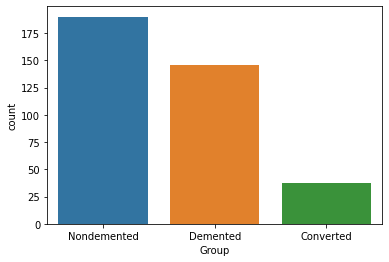

In [9]:
sns.countplot(x="Group", data=dementia) 

dementia["Group"].value_counts() 

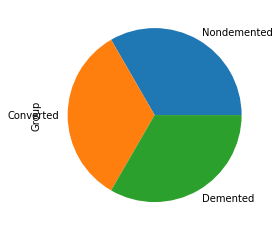

In [10]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie()

In [11]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
dementia['Group'] = le.fit_transform(dementia['Group'])
dementia['M/F'] = le.fit_transform(dementia['M/F'])
x_res['M/F'] = le.fit_transform(x_res['M/F'])
y_res = le.fit_transform(y_res)

In [12]:
dementia.corr()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.048434,0.049262,-0.143918,-0.049267,0.100606,0.066154,0.339906,-0.572518,0.056693,0.258093,-0.042848
Visit,0.048434,1.000000,0.920009,0.069791,0.183213,0.024615,-0.049294,-0.029020,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.049262,0.920009,1.000000,0.048006,0.205357,0.051630,-0.026247,0.065786,-0.062915,0.119624,-0.105586,-0.123545
M/F,-0.143918,0.069791,0.048006,1.000000,-0.037726,0.089279,-0.048504,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,-0.049267,0.183213,0.205357,-0.037726,1.000000,-0.027886,-0.045410,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.100606,0.024615,0.051630,0.089279,-0.027886,1.000000,-0.691222,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.066154,-0.049294,-0.026247,-0.048504,-0.045410,-0.691222,1.000000,-0.139063,0.052313,-0.249030,0.092361,0.240831
MMSE,0.339906,-0.029020,0.065786,-0.166521,0.055607,0.194454,-0.139063,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,-0.572518,0.002325,-0.062915,0.202140,-0.026257,-0.153121,0.052313,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.056693,0.117428,0.119624,0.572549,0.042348,0.257015,-0.249030,-0.031789,0.022819,1.000000,-0.210122,-0.988877


In [13]:
dementia.head(4)

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010


In [14]:
x_res.head()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [15]:
y_res

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,

In [16]:
Scaler = StandardScaler() 

x = Scaler.fit_transform(x_res) 
x 

array([[-0.96523113, -0.9531115 ,  1.19395641, ...,  3.03419183,
        -0.85721327, -2.41976445],
       [ 0.11993996, -0.25439589,  1.19395641, ...,  3.13597334,
        -1.26748943, -2.47315312],
       [-0.96523113, -0.9531115 ,  1.19395641, ...,  1.18416325,
         0.23685651, -1.17657117],
       ...,
       [ 0.11993996, -0.19323916,  1.19395641, ...,  2.68095012,
         0.10009779, -2.21383673],
       [ 0.11993996, -0.07398355, -0.83755151, ...,  0.01666948,
         0.56507744, -0.13167867],
       [ 0.11993996, -0.02047141,  1.19395641, ...,  0.10048954,
        -1.13073071, -0.21557515]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.2) 

x_train.shape, x_test.shape 

((456, 11), (114, 11))

In [18]:
x_test.head()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
149,1,0,1,80,17,1.0,28.0,0.0,1660,0.728,1.057
199,2,673,1,72,18,1.0,29.0,0.0,1785,0.687,0.983
466,2,446,0,88,12,3.0,30.0,0.0,1445,0.719,1.215
171,1,0,0,69,12,4.0,23.0,0.5,1447,0.759,1.213
370,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [19]:
y_test

array([2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1,
       1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 0, 0, 2])

In [20]:
x_train.head()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
91,1,0,0,75,18,1.0,30.0,0.0,1317,0.737,1.332
397,1,0,0,65,12,2.0,30.0,0.5,1340,0.754,1.309
252,1,0,0,73,11,4.0,30.0,0.0,1475,0.726,1.190
243,3,1345,1,76,20,2.0,30.0,0.0,1823,0.739,0.963
25,1,0,1,76,16,3.0,21.0,0.5,1602,0.697,1.096


In [21]:
y_train

array([2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [22]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
#xg_model = XGBClassifier(categorical_feature=['Nondemented','Demented','Converted'])
xg_model = XGBClassifier(use_label_encoder=False)

#fitting the models
xg_model.fit(x_train,y_train,eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(x_test)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, xg_y_model))

Error rate of XGB classifier:  0.02631578947368418


In [24]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(x_train, y_train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[23:40:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_child_weighth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:40:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 1, 'max_depth': 5, 'min_child_weighth': 1, 'subsample': 0.8}


In [25]:
xg_model = XGBClassifier(gamma= 1, max_depth= 5, subsample= 0.8, use_label_encoder=False)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(use_label_encoder=False)

xgb_model.fit(x_train, y_train,eval_metric='merror')
y_pred = xgb_model.predict(x_test)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of the XGB classifier:  0.02631578947368418


In [27]:
xg_model.fit(x_train, y_train,eval_metric='merror')
xg_model.score(x_test, y_test)

0.9385964912280702

In [28]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


In [29]:
rf = RandomForestClassifier(max_depth= 25, min_samples_leaf= 1, min_samples_split = 2, n_estimators= 40)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=40)

In [30]:
rf.score(x_test, y_test)

0.9736842105263158

In [31]:
import pickle 

pickle.dump(rf, open("dementia.pkl","wb"))